# COP Optimization for a Simple Vapor Recompression Cycle

In [1]:
from vapor_compression import SimpleVaporCompressionCycle, Mode

## Define the Refrigerant

| Refrigerant | IDAES | CoolProp |
| --- | --- | --- |
| CO2 | Yes | Yes | 
| Propane | Yes | Yes |
| R32 | Yes | Yes |
| R125 | Yes | Yes |
| R134a | Yes | Yes |
| R227ea | Yes | Yes |
| R1234ze | Yes | Yes |



In [32]:
working_fluid = 'R227ea'

vc = SimpleVaporCompressionCycle(working_fluid, mode=Mode.PH)

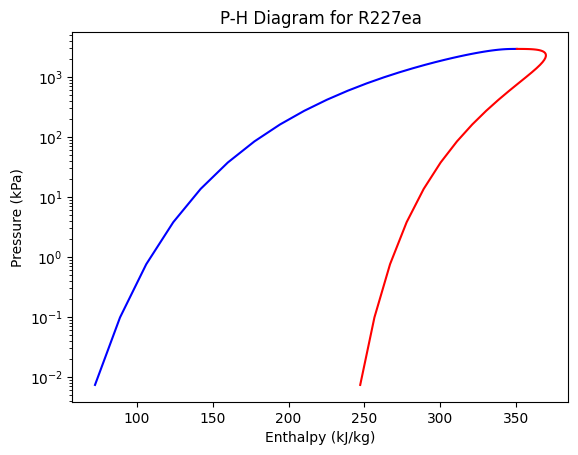

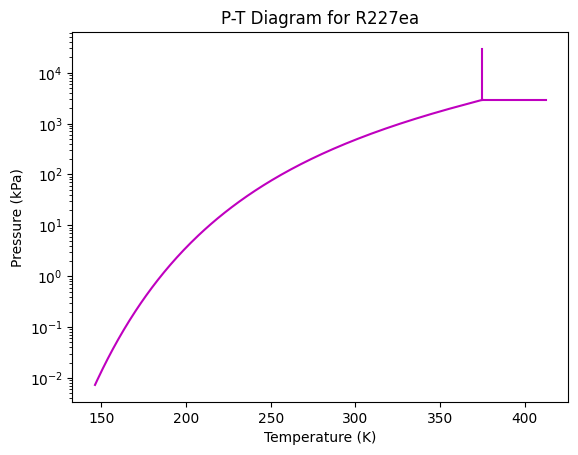

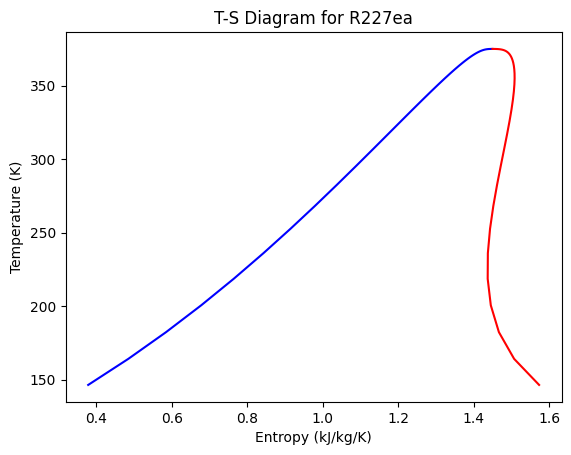

In [3]:
vc.draw_thermodynamic_diagrams()

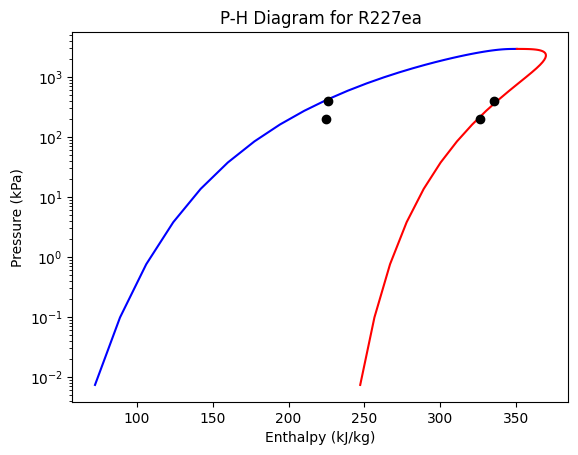

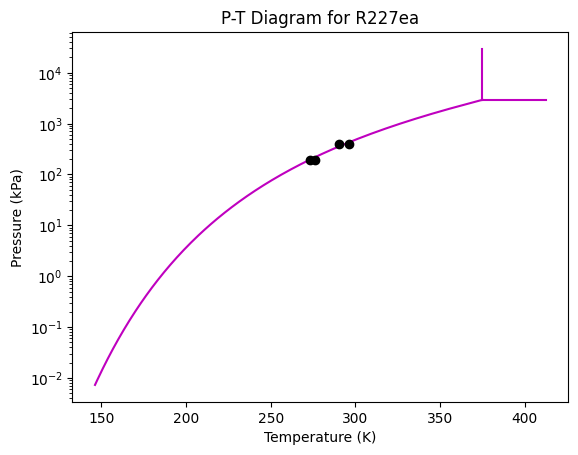

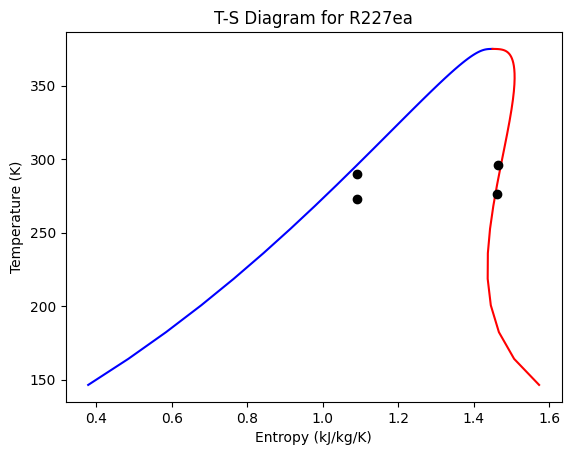

In [4]:
vc.specify_initial_conditions(low_side_temperature=0,
                              high_side_temperature=20)

## Initialize

In [5]:
vc.initialize(verbose=True)


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 1.0148e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     5.8814     5.8814
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     273.15     275.54
    P                          pascal 1.9536e+05 1.9536e+05
    Vapor Fraction      dimensionless    0.20000     1.0000
    Mass Enthalpy    joule / kilogram 2.2489e+05 3.2637e+05


  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.



Unit : fs.compressor                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key                   : Value      : Units         : Fixed : Bounds
    Isentropic Efficiency :    0.85000 : dimensionless :  True : (None, None)
          Mechanical Work :     10086. :          watt : False : (None, None)
          Pressure Change : 1.9372e+05 :        pascal : False : (None, None)
           Pressure Ratio :     1.9916 : dimensionless : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     5.8814     5.8814
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     275.54     293.15
    P                          pascal 1.9536e+05 3.8908e+05
   

### Optimize

In [6]:
vc.set_specifications(
    low_side_pressure=(50, 300), # Pa
    high_side_pressure=(500, 2000), # Pa
    evaporator_temperature=(-20, 10), # degC
    condenser_temperature=(30, 40), # degC
    subcooling = 3, # deg C
    superheating = 3 # deg C
)

vc.optimize_COP(verbose=True, initialize=True)

2025-03-12 18:49:16 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.evaporator.control_volume.heat


2025-03-12 18:49:16 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.compressor.control_volume.work


2025-03-12 18:49:16 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.condenser.control_volume.heat


2025-03-12 18:49:16 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.expansion_valve.control_volume.work


Ipopt 3.13.2: max_iter=1000
tol=1e-06
linear_solver=ma57


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale 


Flowsheet : fs                                                             Time: 0.0
------------------------------------------------------------------------------------
    Stream Table
                         Units         evaporator_to_compressor  compressor_to_condenser  condenser_to_expansion_valve  expansion_valve_to_evaporator
    Molar Flow          mole / second             5.8814                   5.8814                      5.8814                        5.8814          
    Mass Flow       kilogram / second             1.0000                   1.0000                      1.0000                        1.0000          
    T                          kelvin             280.93                   317.59                      306.87                        275.49          
    P                          pascal         2.1302e+05               7.9209e+05                  7.9209e+05                    2.1302e+05          
    Vapor Fraction      dimensionless             1.0000      

7.955937712656218

Optimized COP: 7.956


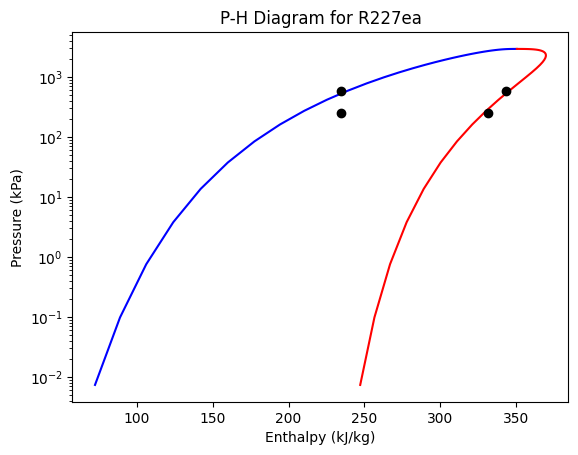

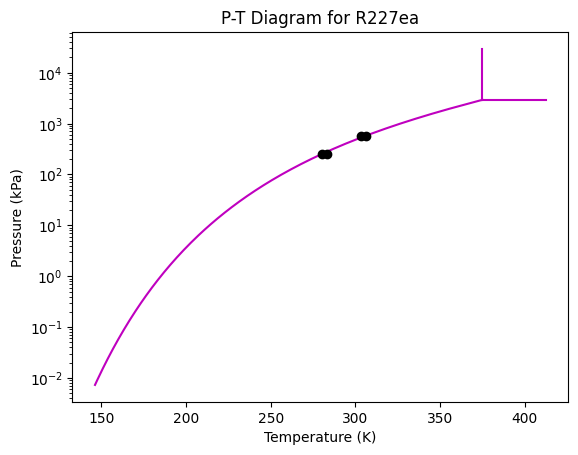

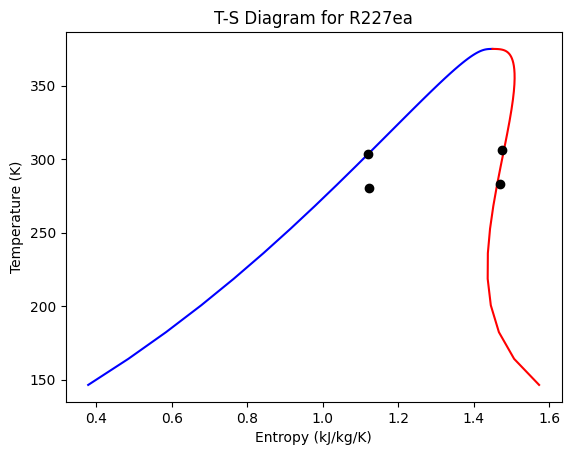


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value  : Units : Fixed : Bounds
    Heat Duty : 96790. :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     5.8814     5.8814
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     280.15     283.15
    P                          pascal 2.5185e+05 2.5185e+05
    Vapor Fraction      dimensionless    0.22110     1.0000
    Mass Enthalpy    joule / kilogram 2.3464e+05 3.3143e+05

Unit : fs.compressor                                                       Time: 0.0
-------------------------------------------------------------------------------

In [7]:
vc.report_solution()

In [8]:
'''
for i in dir(vc.model.fs.condenser.control_volume.properties_out[0]):
    print(i)

vc.model.fs.condenser.control_volume.properties_out[0].t_sat_func()
'''


'\nfor i in dir(vc.model.fs.condenser.control_volume.properties_out[0]):\n    print(i)\n\nvc.model.fs.condenser.control_volume.properties_out[0].t_sat_func()\n'

In [9]:
from idaes.core.util import DiagnosticsToolbox

# Create a diagnostics toolbox instance
diag = DiagnosticsToolbox(vc.model, constraint_residual_tolerance=1e-9)

# Run the diagnostics
diag.display_constraints_with_large_residuals()

The following constraint(s) have large residuals (>1.0E-09):

    fs.compute_cop: 6.34464E-08
    fs.evaporator.T_upper_bound: 2.59410E-06
    fs.condenser.T_lower_bound: 2.78454E-06



In [10]:
diag.report_numerical_issues()

2025-03-12 18:49:16 [WARNING] idaes.core.util.scaling: Nonsquare Jacobian using pseudo inverse


Model Statistics

    Jacobian Condition Number: 8.123E+10

------------------------------------------------------------------------------------
2 WARNINGS


------------------------------------------------------------------------------------
5 Cautions

    Caution: 1 Variable with value close to zero (tol=1.0E-08)
    Caution: 24 Variables with extreme value (<1.0E-04 or >1.0E+04)
    Caution: 16 Variables with extreme Jacobian values (<1.0E-04 or >1.0E+04)
    Caution: 13 Constraints with extreme Jacobian values (<1.0E-04 or >1.0E+04)
    Caution: 53 extreme Jacobian Entries (<1.0E-04 or >1.0E+04)

------------------------------------------------------------------------------------
Suggested next steps:

    display_constraints_with_large_residuals()
    compute_infeasibility_explanation()
    display_near_parallel_constraints()



In [11]:
diag.display_variables_at_or_outside_bounds()

The following variable(s) have values at or outside their bounds (tol=0.0E+00):




In [12]:
diag.report_numerical_issues()

2025-03-12 18:49:16 [WARNING] idaes.core.util.scaling: Nonsquare Jacobian using pseudo inverse


Model Statistics

    Jacobian Condition Number: 8.123E+10

------------------------------------------------------------------------------------
2 WARNINGS


------------------------------------------------------------------------------------
5 Cautions

    Caution: 1 Variable with value close to zero (tol=1.0E-08)
    Caution: 24 Variables with extreme value (<1.0E-04 or >1.0E+04)
    Caution: 16 Variables with extreme Jacobian values (<1.0E-04 or >1.0E+04)
    Caution: 13 Constraints with extreme Jacobian values (<1.0E-04 or >1.0E+04)
    Caution: 53 extreme Jacobian Entries (<1.0E-04 or >1.0E+04)

------------------------------------------------------------------------------------
Suggested next steps:

    display_constraints_with_large_residuals()
    compute_infeasibility_explanation()
    display_near_parallel_constraints()



In [13]:
diag.report_structural_issues()

Model Statistics

        Activated Blocks: 26 (Deactivated: 0)
        Free Variables in Activated Constraints: 36 (External: 0)
            Free Variables with only lower bounds: 0
            Free Variables with only upper bounds: 0
            Free Variables with upper and lower bounds: 20
        Fixed Variables in Activated Constraints: 2 (External: 0)
        Activated Equality Constraints: 32 (Deactivated: 1)
        Activated Inequality Constraints: 6 (Deactivated: 5)
        Activated Objectives: 1 (Deactivated: 0)

------------------------------------------------------------------------------------
3 WARNINGS

        Under-Constrained Set: 27 variables, 23 constraints
        Over-Constrained Set: 0 variables, 0 constraints

------------------------------------------------------------------------------------
0 Cautions

    No cautions found!

------------------------------------------------------------------------------------
Suggested next steps:

    display_components_w

In [14]:
# vc.model.pprint()

In [15]:
from pyomo.environ import Constraint

for constraint in vc.model.component_objects(Constraint, active=True):
    print(constraint.name)

fs.compute_cop
fs.evaporator.superheating_constraint
fs.evaporator.T_lower_bound
fs.evaporator.T_upper_bound
fs.evaporator.control_volume.material_balances
fs.evaporator.control_volume.enthalpy_balances
fs.evaporator.control_volume.pressure_balance
fs.compressor.ratioP_calculation
fs.compressor.isentropic_pressure
fs.compressor.state_material_balances
fs.compressor.isentropic
fs.compressor.isentropic_energy_balance
fs.compressor.actual_work
fs.compressor.control_volume.material_balances
fs.compressor.control_volume.enthalpy_balances
fs.compressor.control_volume.pressure_balance
fs.condenser.subcooling_constraint
fs.condenser.T_lower_bound
fs.condenser.T_upper_bound
fs.condenser.control_volume.material_balances
fs.condenser.control_volume.enthalpy_balances
fs.condenser.control_volume.pressure_balance
fs.expansion_valve.ratioP_calculation
fs.expansion_valve.zero_work_equation
fs.expansion_valve.control_volume.material_balances
fs.expansion_valve.control_volume.enthalpy_balances
fs.expans

In [16]:
from idaes.core.util.model_diagnostics import DegeneracyHunter2

In [17]:
# dh = DegeneracyHunter2(vc.model, solver='gurobi')

In [18]:
# dh.find_irreducible_degenerate_sets(tee=True)

In [19]:
# dh.report_irreducible_degenerate_sets(tee=True)

In [20]:
diag.display_overconstrained_set()

Dulmage-Mendelsohn Over-Constrained Set



In [21]:
diag.display_underconstrained_set()

Dulmage-Mendelsohn Under-Constrained Set

    Independent Block 0:

        Variables:

            fs.cop
            fs.compressor.control_volume.deltaP[0.0]
            fs.condenser.control_volume.properties_in[0.0].enth_mass
            fs.expansion_valve.control_volume.deltaP[0.0]
            fs.evaporator.control_volume.heat[0.0]
            fs.evaporator.control_volume.properties_in[0.0].enth_mass
            fs.expansion_valve.control_volume.properties_out[0.0].enth_mass
            fs.expansion_valve.control_volume.properties_in[0.0].enth_mass
            fs.condenser.control_volume.properties_out[0.0].enth_mass
            fs.condenser.control_volume.heat[0.0]
            fs.compressor.control_volume.properties_in[0.0].pressure
            fs.evaporator.control_volume.properties_out[0.0].pressure
            fs.compressor.ratioP[0.0]
            fs.compressor.properties_isentropic[0.0].enth_mass
            fs.evaporator.control_volume.properties_in[0.0].pressure
            

In [22]:
from idaes.core.util.model_diagnostics import SVDToolbox

st = SVDToolbox(vc.model)

In [23]:
st.run_svd_analysis()

In [24]:
st.display_rank_of_equality_constraints()


Number of Singular Values less than 1.0E-06 is 6



In [25]:
st.display_underdetermined_variables_and_constraints()

Constraints and Variables associated with smallest singular values

    Smallest Singular Value 1 (3.217e-07):

        Variables:

            fs.compressor.control_volume.work[0.0]
            fs.evaporator.control_volume.properties_out[0.0].enth_mass
            fs.compressor.properties_isentropic[0.0].enth_mass
            fs.compressor.control_volume.properties_in[0.0].enth_mass
            fs.compressor.control_volume.properties_out[0.0].enth_mass
            fs.condenser.control_volume.properties_in[0.0].enth_mass
            fs.evaporator.control_volume.heat[0.0]
            fs.compressor.work_isentropic[0.0]
            fs.condenser.control_volume.heat[0.0]

        Constraints:

            fs.evaporator.control_volume.enthalpy_balances[0.0]
            fs.compressor.isentropic_energy_balance[0.0]
            fs.compressor.control_volume.enthalpy_balances[0.0]
            fs.condenser.control_volume.enthalpy_balances[0.0]
            fs.expansion_valve.control_volume.enthalpy

## Sensitivity Analysis

In [28]:
run_sensitivity_analysis = True

if run_sensitivity_analysis:
    import numpy as np
    T_ambient = np.linspace(20, 30, 21)

    COP = np.zeros_like(T_ambient)

    for i, Ta in enumerate(T_ambient):
        vc.set_specifications(
            low_side_pressure=(200, 300), # Pa
            high_side_pressure=(1000, 2000), # Pa
            evaporator_temperature=(-30, 0), # degC
            condenser_temperature=(Ta+5, Ta+15), # degC
            subcooling=3,
            superheating=3
        )
        try:
            print(f"\n\nConsidering ambient temperature of {Ta} C...")
            COP[i] = vc.optimize_COP(verbose=False, initialize=False)
        except:
            COP[i] = np.nan



Considering ambient temperature of 20.0 C...




Considering ambient temperature of 20.5 C...




Considering ambient temperature of 21.0 C...




Considering ambient temperature of 21.5 C...




Considering ambient temperature of 22.0 C...


Considering ambient temperature of 22.5 C...



Considering ambient temperature of 23.0 C...




Considering ambient temperature of 23.5 C...




Considering ambient temperature of 24.0 C...




Considering ambient temperature of 24.5 C...




Considering ambient temperature of 25.0 C...




Considering ambient temperature of 25.5 C...




Considering ambient temperature of 26.0 C...




Considering ambient temperature of 26.5 C...




Considering ambient temperature of 27.0 C...




Considering ambient temperature of 27.5 C...




Considering ambient temperature of 28.0 C...




Considering ambient temperature of 28.5 C...




Considering ambient temperature of 29.0 C...




Considering ambient temperature of 29.5 C...




Considering ambient temperature of 30.0 C...


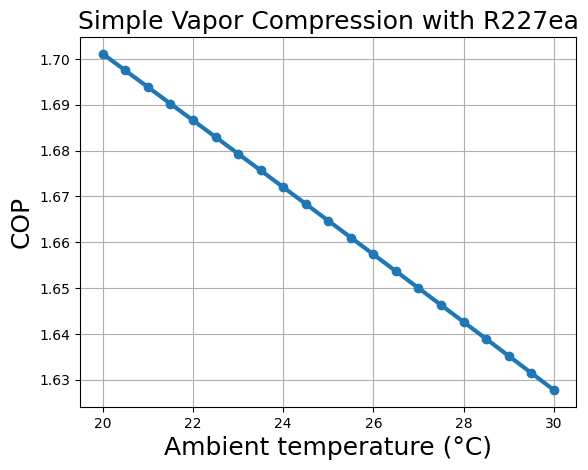

In [33]:
if run_sensitivity_analysis:

    import matplotlib.pyplot as plt
    plt.plot(T_ambient, COP, linewidth=3, marker='o')
    plt.xlabel('Ambient temperature (°C)', fontsize=18)
    plt.ylabel('COP', fontsize=18)
    plt.title(f'Simple Vapor Compression with {working_fluid}', fontsize=18)
    plt.grid()
    plt.show()